In [1]:
#Phase 1 : Analysis of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data=pd.read_csv("Train.csv")
data.head(20)

#m=data.describe() #- This tells us exactly how many NANS we have in our dataset for each column
#m[:1]["Credit_History"] 

#data['Property_Area'].value_counts() - Counts variables by group
#data['ApplicantIncome'].hist(bins=50) - We can infer the range of incomes and also see outliers, these outliers may be due to..
#plot.show()

#data.boxplot(column='ApplicantIncome', by = 'Education') - ... educational diffrences which we compare here 
#Inference: There are higher no. of graduates with very high incomes and not too many high incomes from non-graduates
#plot.show()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


The probability that if your credit score is 1 your loan status becomes Y : 
79.57894736842105
The probability that if your credit score is 0 your loan status becomes Y : 
7.865168539325842


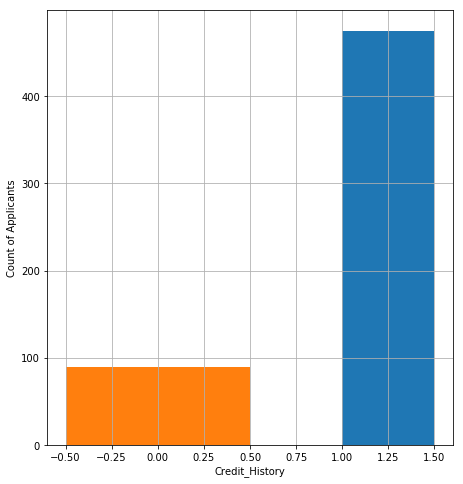

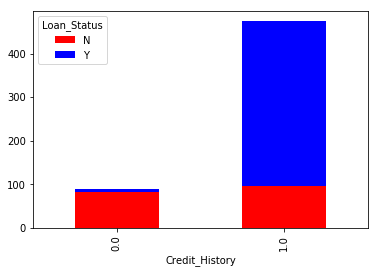

In [2]:
#Phase 2 :Categorical Variable Analysis

#temp2 stores rows of data who's credit scores =1 
temp2=data[data["Credit_History"]==1 ]
#(the final) temp2 stores columns credit history and loan status of data whos credit scores are one
temp2=temp2[["Credit_History","Loan_Status"]]
#temp1 stores columns credit history and loan status of data whos credit scores are one and loan status is "Y"
temp1=temp2[temp2["Loan_Status"]=="Y"]
print("The probability that if your credit score is 1 your loan status becomes Y : ")
probcredscore1=(len(temp1)/len(temp2))*100
print(probcredscore1)

#Similarly we analise for credit score 0
temp3=data[data["Credit_History"]==0]
temp3=temp3[["Credit_History","Loan_Status"]]
temp4=temp3[temp3["Loan_Status"]=="Y"]
print("The probability that if your credit score is 0 your loan status becomes Y : ")
probcredscore2=(len(temp4)/len(temp3))*100
print(probcredscore2)

#Visual Graphs
import matplotlib.patches as mpatches
fig = plot.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
temp2["Credit_History"].hist(bins=2)
temp3["Credit_History"].hist(bins=1)
plot.show()
#combined Visual Graph
temp5 = pd.crosstab(data['Credit_History'],data['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plot.show()



In [3]:
#Phase 3 : Clean Up data
def clean_data(data): # - We need to do this entire method for test data as well so this function can be pretty usefull 
    #data.apply(lambda x: sum(x.isnull()))#-checks missing / NAN values
    data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

    #data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'] )
    #plot.show()
    data['Self_Employed'].value_counts()#-Most values are "no" so we replace all the NA/Missing values with "no"
    data['Self_Employed'].fillna("no",inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

 
    data["CoapplicantIncome"]=data["CoapplicantIncome"].astype(float)
    data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']#-combining 2 features into 1 feature
    data["Total_Income"]=data["Total_Income"].astype(float)
    #np.log(data['Total_Income']).hist(bins=20)
    #data.apply(lambda x: sum(x.isnull()))

    malecount=data[data["Gender"]=="Male"]["Gender"].count()
    femalecount=data[data["Gender"]=="Female"]["Gender"].count()
    totalcount=data["Gender"].count()
    male_ratio=malecount/totalcount
    female_ratio=femalecount/totalcount
    #print("Male %",male_ratio*100)
    #print("Female %", female_ratio*100)
    #gendernan=13 male_ratio*gendernan = no. of people who's data will be entered as male vice versa for females
    #print("Male nans:",13*male_ratio) -there are about 10 male and 3 female nans
    data["Gender"].fillna("Male",limit=10,inplace=True)
    data["Gender"].fillna("Female",limit=3,inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

    marriednanset=data[data["Married"].isnull()]  #-All of the people who did not fill out wether they are married or not
    datafix=np.array(marriednanset["CoapplicantIncome"])  
    for i in range(len(datafix)):
        if datafix[i]!=0: #- If coapplicant income is not 0 it means that they are most likely married 
            marriednanset.fillna("Yes",limit=1,inplace=True)
        else:
            marriednanset.fillna("No",limit=1,inplace=True)
    data[data["Married"].isnull()]=marriednanset #- copying the changed values back into the original data
    #data.apply(lambda x: sum(x.isnull()))

    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True) #-It's unpredictable of how long a person will take a loan and hence 
    #data.apply(lambda x:sum(x.isnull())) #                                                                                      we fill na with mean

    data["Dependents"].fillna(0,inplace=True)#-Unpredictable , so by default we set dependencies to a person as 0
    #data.apply(lambda x:sum(x.isnull()))

    data["Credit_History"].fillna(1,inplace=True) #-By default we assume everyone has a credit history document
    data.apply(lambda x:sum(x.isnull()))
    
    return data
data=clean_data(data)
data.apply(lambda x:sum(x.isnull()))

C:\Users\Harshit\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [4]:
#Phase 4: Preprocessing data
from sklearn.preprocessing import LabelEncoder
def preprocess_data(data):
    var_mod = ['Gender','Married','Education','Self_Employed','Property_Area']
    if "Loan_Status" in data:
        var_mod.append("Loan_Status")
    le = LabelEncoder()
    for feature in var_mod: #-label encoder converts string into int ... for example gender= m and gender = f gets converted into gender=0 and gender=1
        data[feature] = le.fit_transform(data[feature])
    #we have to convert Dependents into the same format , however it contains strings such as 3+ so we can't use the label encoder
    counter=0
    notfour="3+"
    for feature in range(len(data["Dependents"])):
        if data["Dependents"][counter]==notfour:
            data["Dependents"][counter]=4
        elif data["Dependents"][counter]=="Yes" : #- Who the hell put yes and no in dependencies ... so annoying :/
            data["Dependents"][counter]=1
        elif data["Dependents"][counter]=="No":
            data["Dependents"][counter]=0
        else:
            data["Dependents"][counter]=int(data["Dependents"][counter])
        counter=counter+1
    data["Dependents"] = le.fit_transform(data["Dependents"])
    return data
data=preprocess_data(data)
#data.dtypes  #-all data types shoudl be numeric except for loan id



C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value 

In [5]:
#Phase 5 Start the ML Process : GENERIC FUNCTION FOR MAKING CLASSIFICATION MODEL AND DISPLAYING PERFORMANCE

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn import metrics #- Provides accuracy scores
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy=",(accuracy*100),"%")
    #For k fold cross verification
    kf = KFold(data.shape[0], n_folds=5)#KFold returns the indices of 2 values : training set and test set
    error=[]
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:]) #iloc chooses rows , in this case index train and all the columns
        train_target = data[outcome].iloc[train] # The target we choose to train the algorithm
        model.fit(train_predictors, train_target) 
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


#learn about iloc

C:\Users\Harshit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Phase 6 : LOGISTIC REGRESSION
outcome="Loan_Status"
model=LogisticRegression()
features= ['Credit_History','Education','Self_Employed','Total_Income','Property_Area']
predictors=[]
#for choose in features:  #- with this we find out For feature: ['Credit_History'] , Accuracy= 80.94462540716613 % , Cross-Validation Score : 80.946% Hence we use this
 #   predictors.append(choose) # to fit our model
  #  print("For feature:",predictors)
   # classification_model(model,data,predictors,outcome)
predictors=["Credit_History"]
classification_model(model,data,predictors,outcome)

Accuracy= 80.94462540716613 %
Cross-Validation Score : 80.946%


In [7]:
#Phase 7& 8 : Random Forest and Desicion Tree

In [8]:
#Phase 9 : Use test data and determine output
test_data=pd.read_csv("Test.csv")
test_data=preprocess_data(clean_data(test_data))
model.fit(data[predictors],data[outcome])
Y_rusty=model.predict(test_data[predictors])
Y=[]
for j in range(len(Y_rusty)) : # convert the 1s and 0s to Y and N 
    if Y_rusty[j]==1:
        Y.append("Y")
    else:
        Y.append("N")


C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
#Phase 10: Store it into the CSV
df=pd.read_csv("Sample.csv")
df["Loan_Status"]=Y
df["Loan_ID"]=test_data["Loan_ID"]
df.to_csv("Results.csv")


In [15]:
#Phase 11: Check your score/percentage with the answers
answers=pd.read_csv("Answers.csv")
score=0
for j in range(len(answers["Loan_Status"])):
    if answers["Loan_Status"][j]==df["Loan_Status"][j]:
        score=score+1
print("Percent Correct :",(score/len(answers["Loan_Status"]))*100,"%") #- w00w :)


Percent Correct : 100.0 %
